# Tides on non-coplanar binaries

In [1]:
%load_ext autoreload
%autoreload 2

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
from matplotlib import colors
from matplotlib import patheffects
import numpy as np

from reader.mesa_reader import *

warnings.filterwarnings('ignore')

plt.style.use('../config/style.mpl')

#### Load MESA output (histories)

In [2]:
# donor star
i70_h = MesaInfo('../data/raw/tides/e0d0_i7d1/LOGS/history.data')
i135_h = MesaInfo('../data/raw/tides/e0d0_i135d0/LOGS/history.data')

# binary
i70_bh = MesaInfo('../data/raw/tides/e0d0_i7d1/binary_history.data')
i135_bh = MesaInfo('../data/raw/tides/e0d0_i135d0/binary_history.data')

## Evolution of rotational velocities

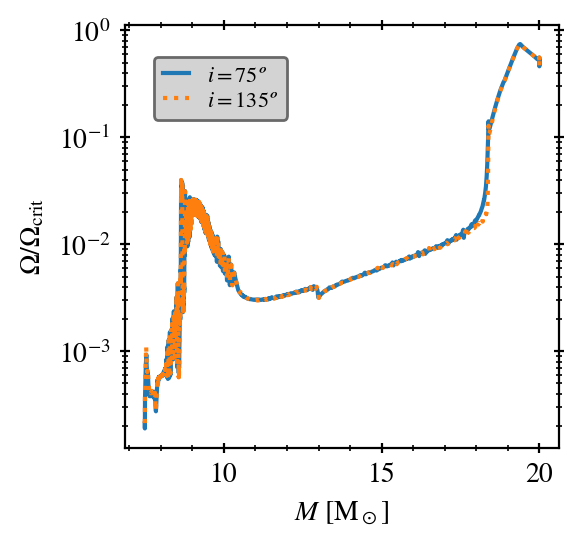

In [3]:
fig, ax = plt.subplots(figsize=(2.8, 2.8))
ax.set_yscale('log')
ax.set_xlabel('$M$ [M$_\\odot$]')
ax.set_ylabel('$\\Omega/\\Omega_{\\rm crit}$')

ax.plot(i70_h.data.star_mass, i70_h.data.surf_avg_omega_div_omega_crit)
ax.plot(i135_h.data.star_mass, i135_h.data.surf_avg_omega_div_omega_crit, ls=':')

f = lambda c, s: plt.plot([],[], color=c, ls=s)[0]
handles = [f('C0', '-'), f('C1', ':')]
legends = ['$i = 75º$', '$i = 135º$']
ax.legend(handles, legends, ncol=1, handlelength=1.2,
    fancybox=True, frameon=True, facecolor='lightgray', edgecolor='dimgray', framealpha=1.0,
    loc='center', bbox_to_anchor=(0.22,0.85), bbox_transform=ax.transAxes);

## Angular momentum profiles at different stages

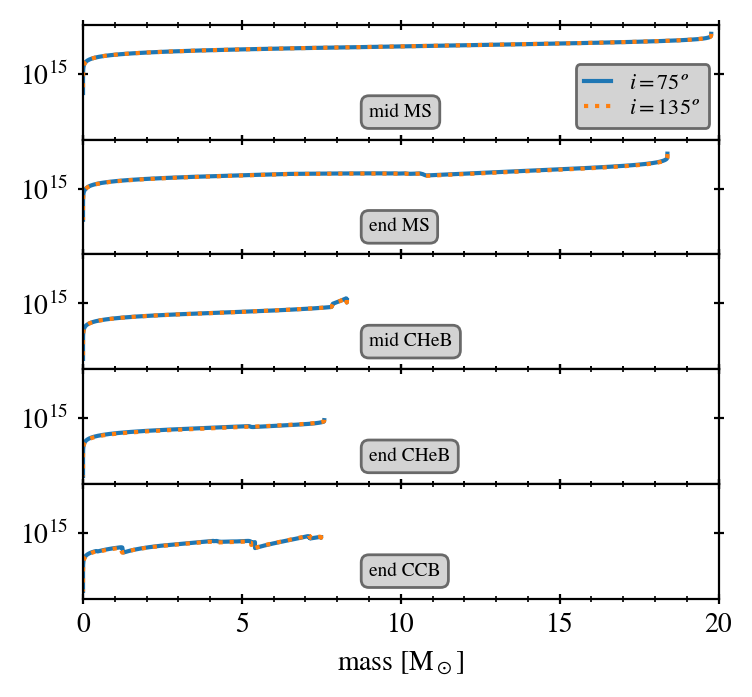

In [4]:
plt.style.use('../config/style.mpl')
fig, axs = plt.subplots(figsize=(4.1, 3.8))

gs = grd.GridSpec(5, 1, figure=fig, height_ratios=[1,1,1,1,1], wspace=0.035, hspace=0.0)

axarr = [plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]),
         plt.subplot(gs[3]), plt.subplot(gs[4])]
axarr[-1].set_xlabel('mass [M$_\\odot$]')

stages = ['h50', 'h00', 'he50', 'he00', 'final']
for k, stage in enumerate(stages):
    
    axarr[k].set_yscale('log')
    axarr[k].set_ylim([2e8, 1e20])
    axarr[k].set_xlim([0,20])
    if k < 4: axarr[k].set_xticklabels([])
    
    msg = ''
    if stage == 'h50': msg = 'mid MS'
    if stage == 'h00': msg = 'end MS'
    if stage == 'he50': msg = 'mid CHeB'
    if stage == 'he00': msg = 'end CHeB'
    if stage == 'final': msg = 'end CCB'
    
    axarr[k].annotate(msg, xy=(0.45, 0.2),
        bbox=dict(facecolor='lightgray', edgecolor='dimgray', boxstyle='round, pad=0.4'),
        fontsize=7, xycoords='axes fraction')
    
    prof_i70 = MesaInfo(f'../data/raw/tides/e0d0_i7d1/LOGS/prof_{stage}.data')
    prof_i135 = MesaInfo(f'../data/raw/tides/e0d0_i135d0/LOGS/prof_{stage}.data')
    
    axarr[k].plot(prof_i70.data.mass, prof_i70.data.j_rot)
    axarr[k].plot(prof_i135.data.mass, prof_i135.data.j_rot, ls=':')

f = lambda c, s: plt.plot([],[], color=c, ls=s)[0]
handles = [f('C0', '-'), f('C1', ':')]
legends = ['$i = 75º$', '$i = 135º$']
axarr[0].legend(handles, legends, ncol=1, handlelength=1.2,
    fancybox=True, frameon=True, facecolor='lightgray', edgecolor='dimgray', framealpha=1.0,
    loc='center', bbox_to_anchor=(0.88,0.38), bbox_transform=axarr[0].transAxes);

## 

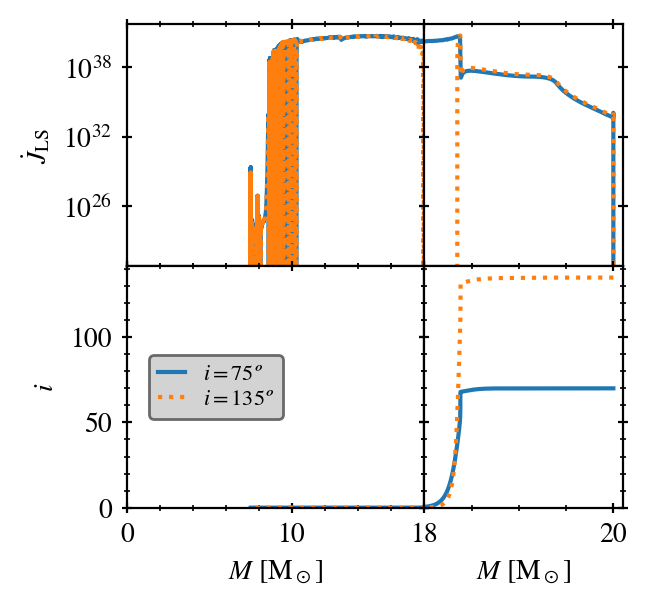

In [5]:
plt.style.use('../config/style.mpl')
fig, axs = plt.subplots(figsize=(3.2, 3.2))

gs = grd.GridSpec(2, 2, figure=fig, height_ratios=[1,1], width_ratios=[1.2, 0.8], wspace=0.0, hspace=0.0)
axarr = [plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]),
         plt.subplot(gs[3])]
axarr[2].set_xlabel('$M$ [M$_\\odot$]')
axarr[3].set_xlabel('$M$ [M$_\\odot$]')
axarr[0].set_ylabel('$\\dot{J}_{\\rm LS}$')
axarr[2].set_ylabel('$i$')
axarr[0].set_yscale('log')
axarr[1].set_yscale('log')
axarr[0].set_xlim([0,18])
axarr[2].set_xlim([0,18])
axarr[1].set_xlim([18,20.1])
axarr[3].set_xlim([18,20.1])
axarr[0].set_ylim([6.211896929234116e+20, 5.270302515593178e+41])
axarr[1].set_ylim([6.211896929234116e+20, 5.270302515593178e+41])
axarr[1].set_yticklabels([])
axarr[2].set_ylim([0, 141.7499999713521])
axarr[3].set_ylim([0, 141.7499999713521])
axarr[3].set_yticklabels([])

axarr[0].set_xticklabels([])
axarr[1].set_xticklabels([])

axarr[0].plot(i70_bh.data.star_1_mass, i70_bh.data.jdot_ls)
axarr[0].plot(i135_bh.data.star_1_mass, i135_bh.data.jdot_ls, ls=':')
axarr[1].plot(i70_bh.data.star_1_mass, i70_bh.data.jdot_ls)
axarr[1].plot(i135_bh.data.star_1_mass, i135_bh.data.jdot_ls, ls=':');

axarr[2].plot(i70_bh.data.star_1_mass, i70_bh.data.inclination)
axarr[2].plot(i135_bh.data.star_1_mass, i135_bh.data.inclination, ls=':')
axarr[3].plot(i70_bh.data.star_1_mass, i70_bh.data.inclination)
axarr[3].plot(i135_bh.data.star_1_mass, i135_bh.data.inclination, ls=':');

f = lambda c, s: plt.plot([],[], color=c, ls=s)[0]
handles = [f('C0', '-'), f('C1', ':')]
legends = ['$i = 75º$', '$i = 135º$']
axarr[2].legend(handles, legends, ncol=1, handlelength=1.2,
    fancybox=True, frameon=True, facecolor='lightgray', edgecolor='dimgray', framealpha=1.0,
    loc='center', bbox_to_anchor=(0.30,0.50), bbox_transform=axarr[2].transAxes);